In [2]:
%pylab inline
import numpy as np
import scipy.optimize
import csv

Populating the interactive namespace from numpy and matplotlib


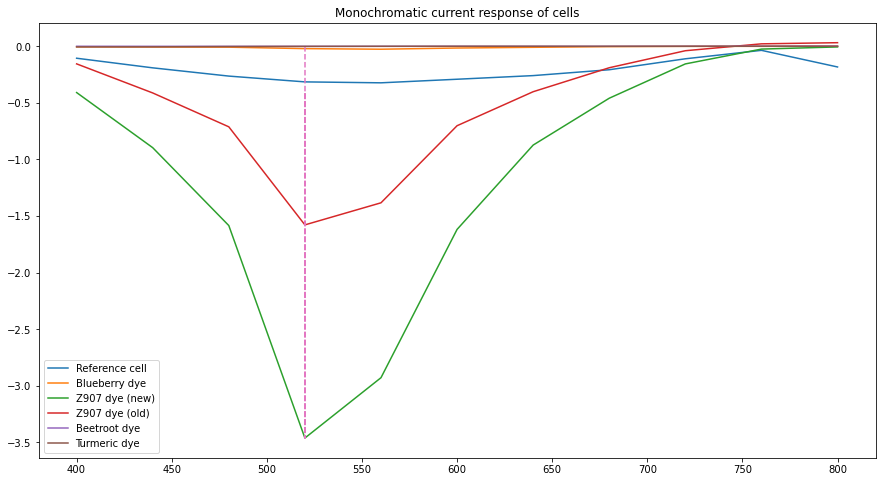

In [3]:
data=open('monochrom.csv','r')
array=[]
for x in data:
    array.append([x])
    
array=array[1:]
wl=[]
ref=[]
blue=[]
z907new=[]
z907old=[]
beet=[]
tur=[]

for y in array:
    y[0]=y[0].split(',')
    wl.append(float(y[0][0]))
    ref.append(-float(y[0][1]))
    blue.append(float(y[0][2]))
    z907new.append(float(y[0][3]))
    z907old.append(float(y[0][4]))
    beet.append(float(y[0][5]))
    tur.append(float(y[0][6]))

figure = figsize(15,8)
plot(wl,ref,label='Reference cell')
plot(wl,blue,label='Blueberry dye')
plot(wl,z907new,label='Z907 dye (new)')
plot(wl,z907old,label='Z907 dye (old)')
plot(wl,beet,label='Beetroot dye')
plot(wl,tur,label='Turmeric dye')
plot(520.0+np.array(wl)-np.array(wl),z907new, linestyle='--')
title('Monochromatic current response of cells')
legend()

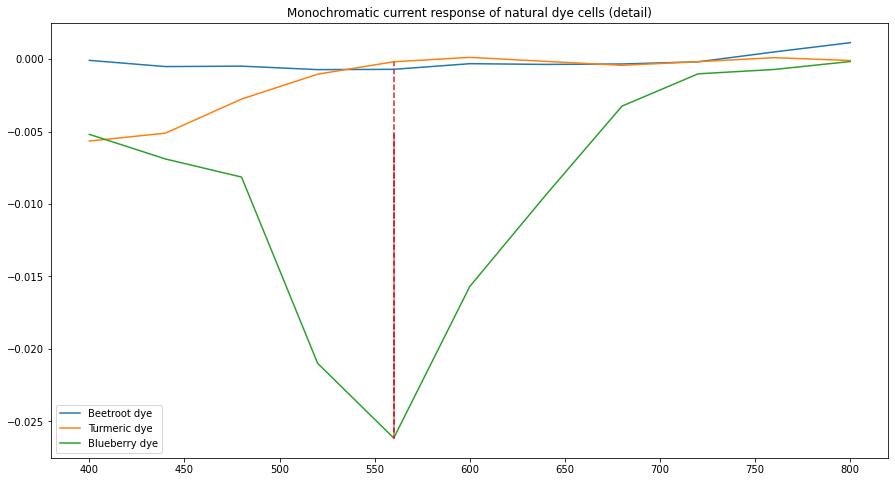

In [4]:
plot(wl,beet,label='Beetroot dye')
plot(wl,tur,label='Turmeric dye')
plot(wl,blue,label='Blueberry dye')
plot(560.0+np.array(wl)-np.array(wl),blue, linestyle='--')
title('Monochromatic current response of natural dye cells (detail)')
legend()

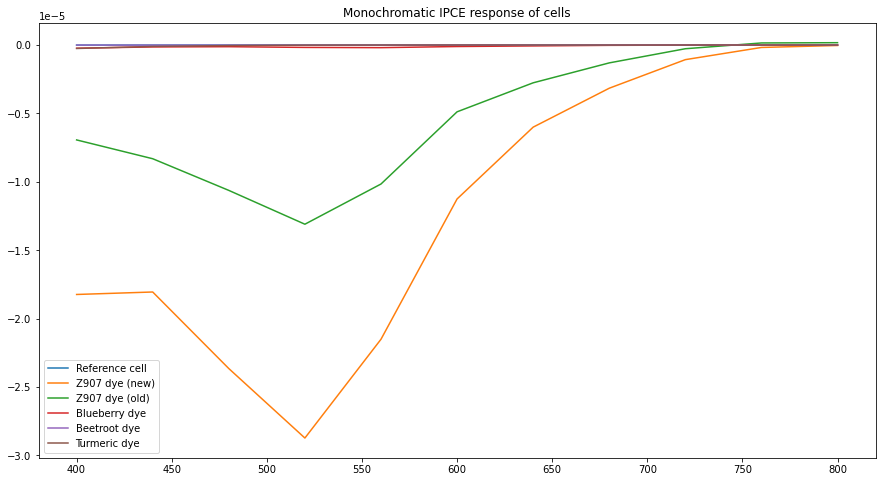

In [5]:
power=np.array([69.6,140,173.19,287.55,301.72,297.46,282.06,265.41,251.75,230.24,284.89])
refipce=(np.array(ref)*6.24E18)/((power*10**-3)/(6.63E-34*3E8/np.array(wl)))
z907newipce=(np.array(z907new)*6.24E18)/((power*10**-6)/(6.63E-34*3E8/np.array(wl)))
z907oldipce=(np.array(z907old)*6.24E18)/((power*10**-6)/(6.63E-34*3E8/np.array(wl)))
blueipce=(np.array(blue)*6.24E18)/((power*10**-6)/(6.63E-34*3E8/np.array(wl)))
beetipce=(np.array(beet)*6.24E18)/((power*10**-6)/(6.63E-34*3E8/np.array(wl)))
turipce=(np.array(tur)*6.24E18)/((power*10**-6)/(6.63E-34*3E8/np.array(wl)))
plot(wl,refipce,label='Reference cell')
plot(wl,z907newipce,label='Z907 dye (new)')
plot(wl,z907oldipce,label='Z907 dye (old)')
plot(wl,blueipce,label='Blueberry dye')
plot(wl,beetipce,label='Beetroot dye')
plot(wl,turipce,label='Turmeric dye')
title('Monochromatic IPCE response of cells')
legend()

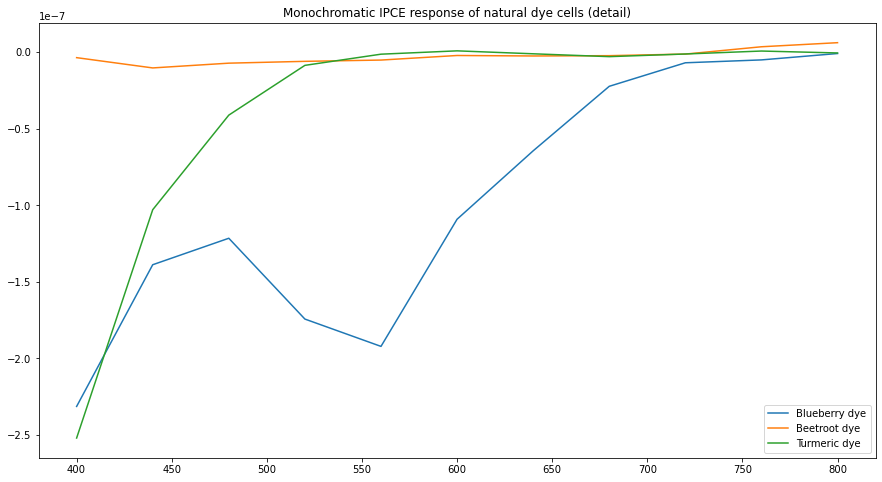

In [6]:
plot(wl,blueipce,label='Blueberry dye')
plot(wl,beetipce,label='Beetroot dye')
plot(wl,turipce,label='Turmeric dye')
title('Monochromatic IPCE response of natural dye cells (detail)')
legend()